# Mini Projeto - Machine Learning

## 2ª Etapa: Classificação dos dígitos 1 x 5

### Vizualização de todos os dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from linear_models import *
from utils import *
from sklearn.metrics import classification_report

In [2]:
new_train_df = pd.read_csv('./dados/train_reduced.csv')
new_test_df = pd.read_csv('./dados/test_reduced.csv')

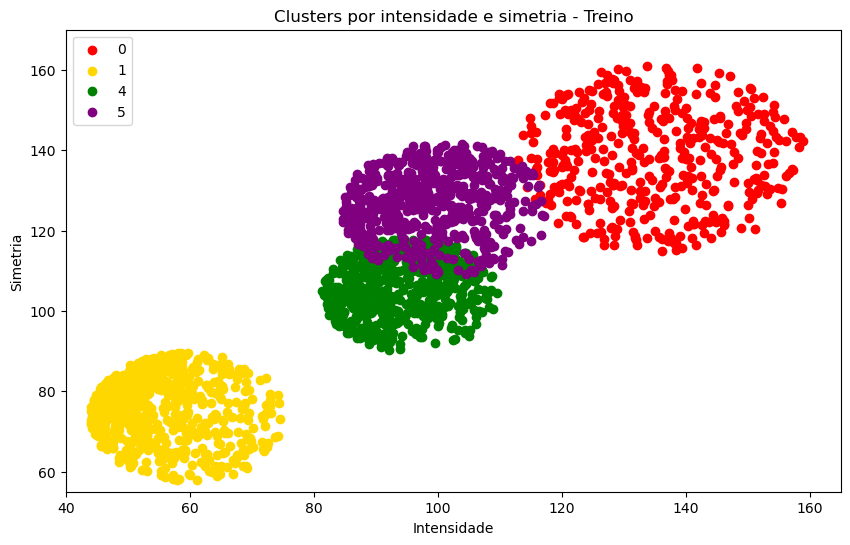

In [3]:
plot_classification_digits(new_train_df, [0, 1, 4, 5],
                              'Clusters por intensidade e simetria - Treino')

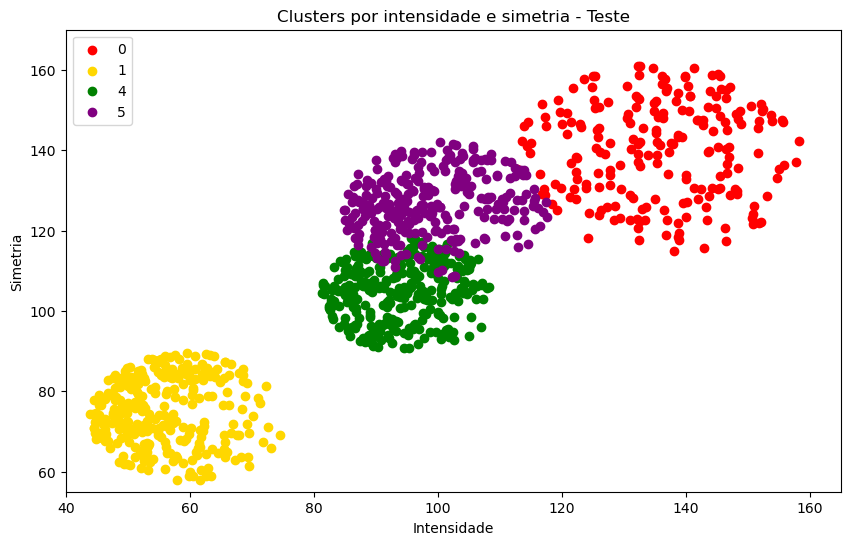

In [4]:
plot_classification_digits(new_test_df, [0, 1, 4, 5],
                              'Clusters por intensidade e simetria - Teste')

In [5]:
mask1 = new_train_df['label'] == 5
mask2 = new_train_df['label'] == 1
mask3 = new_test_df['label'] == 5
mask4 = new_test_df['label'] == 1

In [6]:
train1x5 = new_train_df[mask1 | mask2]
test1x5 = new_test_df[mask3 | mask4]

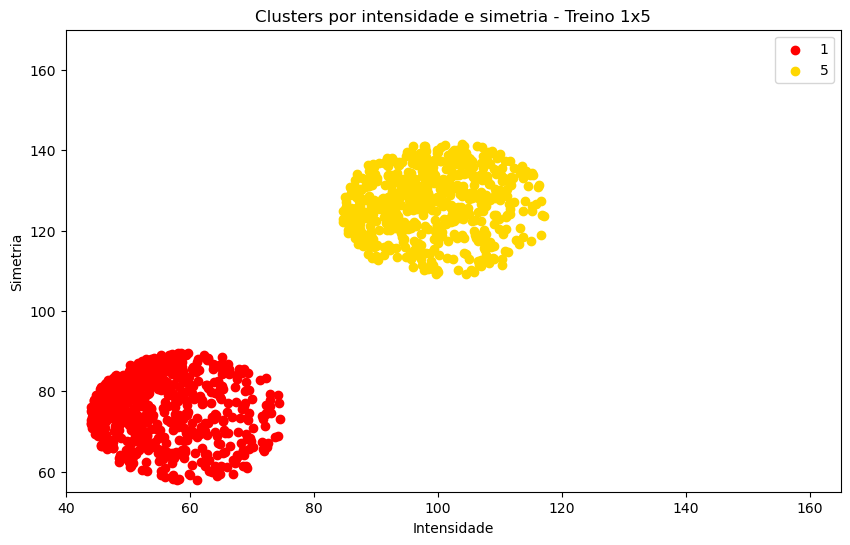

In [7]:
plot_classification_digits(train1x5, [1, 5], 'Clusters por intensidade e simetria - Treino 1x5')

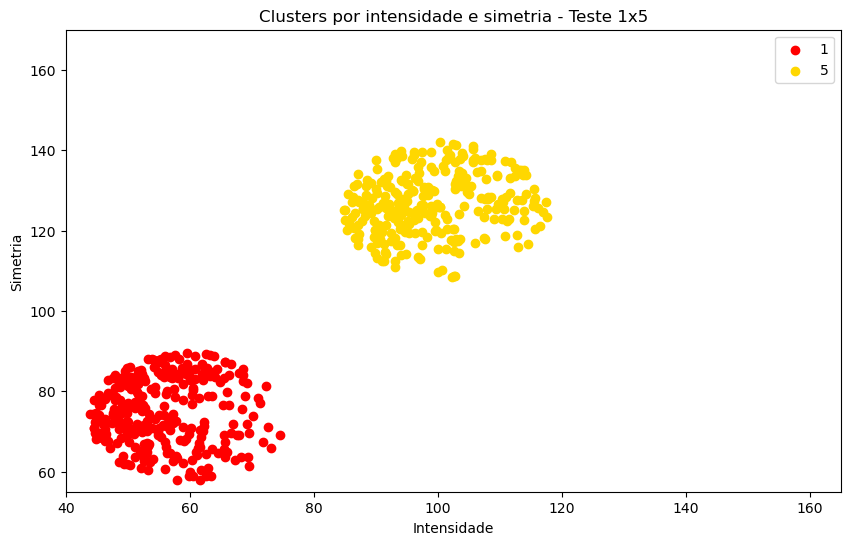

In [8]:
plot_classification_digits(test1x5, [1, 5], 'Clusters por intensidade e simetria - Teste 1x5')

In [9]:
X_train = train1x5[['intensidade', 'simetria']]
X_train = X_train.to_numpy()
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = test1x5[['intensidade', 'simetria']]
X_test = X_test.to_numpy()
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

y_train = [1 if label == 1 else -1 for label in train1x5.label]
y_test = [1 if label == 1 else -1 for label in test1x5.label]

### Relatorio Modelos

---------------------------------
RELATORIO CLASSIFICACAO MULTICLASS
_______________________________________________________
Acurracy: 1.0
Multiclass Error: 0.0
_______________________________________________________
_______________________________________________________
Precision for label -1 : 1.0
Recall for label -1 : 1.0
F1 Score for label -1 : 1.0
_______________________________________________________
_______________________________________________________
Precision for label 1 : 1.0
Recall for label 1 : 1.0
F1 Score for label 1 : 1.0
_______________________________________________________
Weighted F1 Score: 1.0
---------------------------------


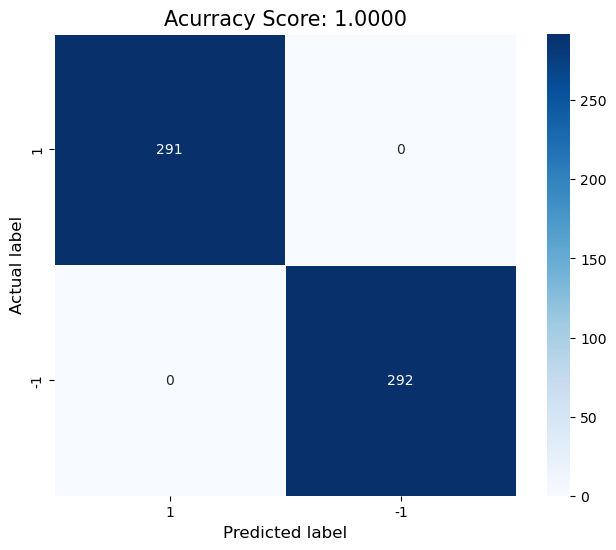

In [14]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred = linear_reg.predict(X_test)
metrics = Metrics_multiclass([1, -1])
metrics.print_metrics_multiclass(y_test, y_pred)

100%|██████████| 1000/1000 [00:01<00:00, 667.91it/s]


---------------------------------
RELATORIO CLASSIFICACAO MULTICLASS
_______________________________________________________
Acurracy: 0.0017152658662092624
Multiclass Error: 0.0
_______________________________________________________
_______________________________________________________
Precision for label -1 : 1.0
Recall for label -1 : 1.0
F1 Score for label -1 : 1.0
_______________________________________________________
_______________________________________________________
Precision for label 1 : 1.0
Recall for label 1 : 1.0
F1 Score for label 1 : 1.0
_______________________________________________________
Weighted F1 Score: 1.0
---------------------------------


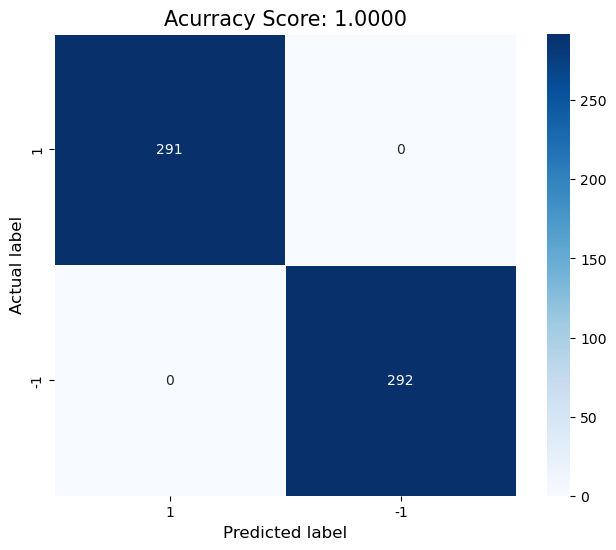

In [15]:
Nmin = np.ceil(X_train.shape[0] * 0.2).astype(int)
Nmax = np.ceil(X_train.shape[0] * 0.5).astype(int) 

pocket_pla = PocketPLA(1000, Nmin=Nmin, Nmax=Nmax)
pocket_pla.fit(X_train, y_train)
y_pred = pocket_pla.predict(X_test)
metrics = Metrics_multiclass([1, -1])
metrics.print_metrics_multiclass(y_test, y_pred)

100%|██████████| 40000/40000 [00:03<00:00, 12704.65it/s]


---------------------------------
RELATORIO CLASSIFICACAO MULTICLASS
_______________________________________________________
Acurracy: 0.0017152658662092624
Multiclass Error: 0.0
_______________________________________________________
_______________________________________________________
Precision for label -1 : 1.0
Recall for label -1 : 1.0
F1 Score for label -1 : 1.0
_______________________________________________________
_______________________________________________________
Precision for label 1 : 1.0
Recall for label 1 : 1.0
F1 Score for label 1 : 1.0
_______________________________________________________
Weighted F1 Score: 1.0
---------------------------------


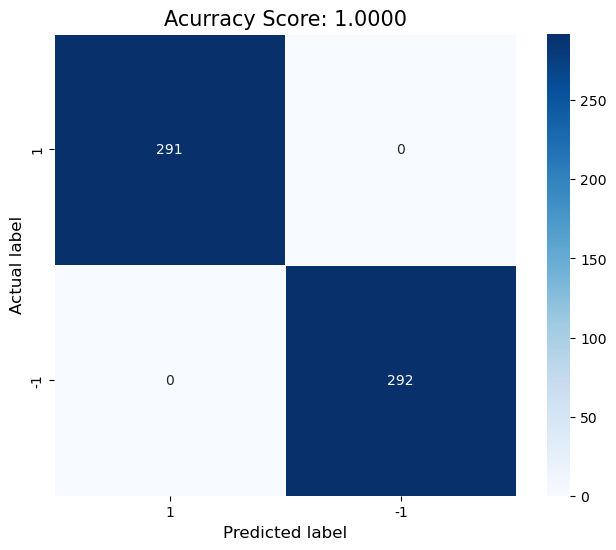

In [16]:
logistic_reg = LogisticRegression(tmax=40000, batch_size=128)
logistic_reg.fit(X_train, y_train)
ypred = logistic_reg.predict(X_test)
metrics = Metrics_multiclass([1, -1])
metrics.print_metrics_multiclass(y_test, y_pred)

In [17]:
w_lin = linear_reg.get_w()
w_pocket = pocket_pla.get_w()
w_logistic = logistic_reg.get_w()

### Comparação entre as retas classificadoras

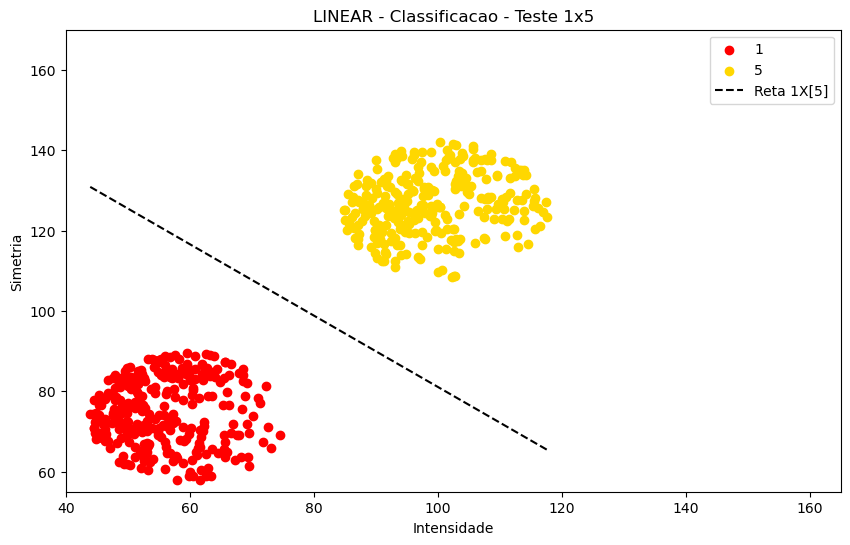

In [18]:
plot_classification_digits(test1x5, [1, 5], 'LINEAR - Classificacao - Teste 1x5', W=[w_lin])

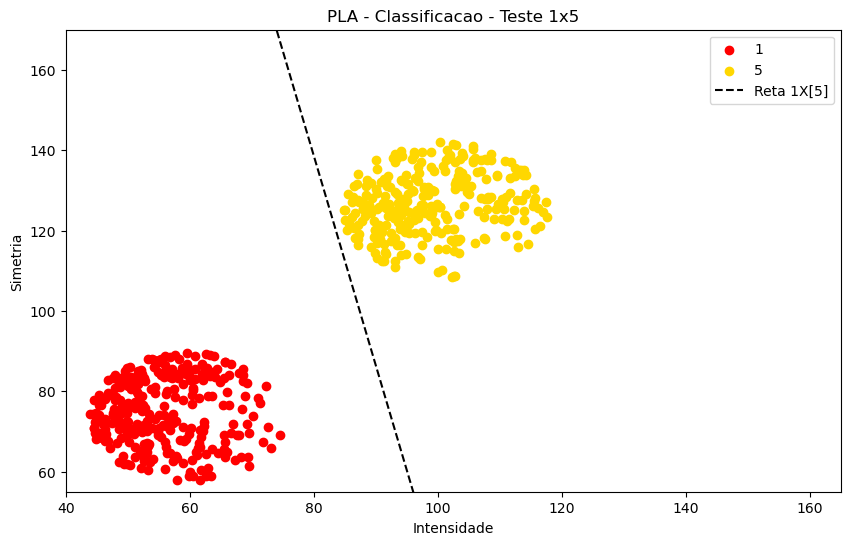

In [19]:
plot_classification_digits(test1x5, [1, 5], 'PLA - Classificacao - Teste 1x5', W=[w_pocket])

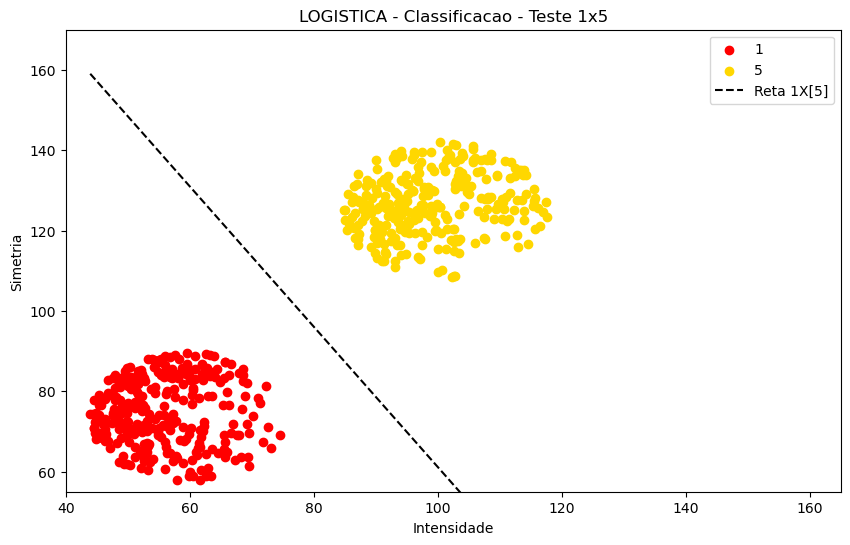

In [20]:
plot_classification_digits(test1x5, [1, 5], 'LOGISTICA - Classificacao - Teste 1x5', W=[w_logistic])